### Database

###### This will help understand how to connect to postgres database, retrieve information and also update the information on it

Start by installing the python package for connecting to PostgreSQL database which is psycopg2

In [1]:
#Connect to postgres
import psycopg2

conn = psycopg2.connect(
    host="localhost",
    database="postgres",
    user="postgres",
    password="@Ebuka79")

cur = conn.cursor()

cur.execute('SELECT version()')

print(cur.fetchone())

#cur.close()

('PostgreSQL 14.3, compiled by Visual C++ build 1914, 64-bit',)


In [7]:
#create a table in the database

create_command = """
CREATE TABLE Test(
    firstname VARCHAR(15),
    lastname VARCHAR(15),
    age INT,
    location VARCHAR(2),
    occupation VARCHAR(10)
)
"""

cur.execute(create_command)

cur.close()

conn.commit()

print("Table creation successful")

conn.close()



Table creation successful


In [13]:
#insert values into test table in database

insert_com = """
INSERT INTO 
    test (firstname,lastname,age,location,occupation)
VALUES
    ('Ebuka','Ifechukwu',24,'LG','Engineer'),
    ('Chidera','Ifechukwu',23,'UK','Media'),
    ('Ugonna','Ifechukwu',19,'EN','Lawyer'),
    ('Uchenna','Ifechukwu',19,'LG','Designer')
"""

cur.execute(insert_com)

cur.close()

conn.commit()

print("Values added successfully")

conn.close()

Values added successfully


Note: if a transaction or command was not successful, it cannot be redone until the connection to the database has been closed and opened again. Best to do an exception to avoid this

In [15]:
#obtain data from database
import pandas as pd

retrieve_com = """
SELECT * 
FROM test
"""

cur.execute(retrieve_com)

data = cur.fetchall()

print(data)

cur.close()

conn.close()

[('Ebuka', 'Ifechukwu', 24, 'LG', 'Engineer'), ('Chidera', 'Ifechukwu', 23, 'UK', 'Media'), ('Ugonna', 'Ifechukwu', 19, 'EN', 'Lawyer'), ('Uchenna', 'Ifechukwu', 19, 'LG', 'Designer')]


In [21]:
{
    "tags": [
        "hide-input",
    ]
}

data

[('Ebuka', 'Ifechukwu', 24, 'LG', 'Engineer'),
 ('Chidera', 'Ifechukwu', 23, 'UK', 'Media'),
 ('Ugonna', 'Ifechukwu', 19, 'EN', 'Lawyer'),
 ('Uchenna', 'Ifechukwu', 19, 'LG', 'Designer')]

In [17]:
#convert the list of tuples to dataframe in pandas for more analysis

pd_data = pd.DataFrame(data, columns=['firstname','lastname','age','location','occupation'])

pd_data

,firstname,lastname,age,location,occupation
0,Ebuka,Ifechukwu,24,LG,Engineer
1,Chidera,Ifechukwu,23,UK,Media
2,Ugonna,Ifechukwu,19,EN,Lawyer
3,Uchenna,Ifechukwu,19,LG,Designer


In [1]:
#connecting to a different database to obtain data and put in pandas dataframe for analysis

import psycopg2
import pandas as pd

conn = psycopg2.connect(
    host="localhost",
    database="postgres",
    user="postgres",
    password="@Ebuka79")

cur = conn.cursor()

cur.execute('SELECT version()')

retrieve_com = """
SELECT * 
FROM product
"""

cur.execute(retrieve_com)

data = cur.fetchall()

pd_data = pd.DataFrame(data, columns=['productkey','productname','price','quantity','categorykey'])

cur.close()

conn.close()


In [2]:
pd_data.head()

,productkey,productname,price,quantity,categorykey
0,3,Bread,500,500,1
1,4,Butter,400,1000,1
2,5,Milk,1400,1000,1
3,6,Sugar,200,1000,1
4,7,Salt,200,1000,1


In [32]:
pd_data.columns

Index(['productkey', 'productname', 'price', 'quantity', 'categorykey'], dtype='object')

In [35]:
pd_data.groupby('categorykey')['productkey'].describe()

,count,mean,std,min,25%,50%,75%,max
categorykey,,,,,,,,
1,10.0,5.5,3.027650,1.0,3.25,5.5,7.75,10.0
2,8.0,14.5,2.449490,11.0,12.75,14.5,16.25,18.0
3,7.0,22.0,2.160247,19.0,20.50,22.0,23.50,25.0


In [8]:
#call a function in the database

cur.callproc('seldata','2')

'2'

In [9]:
cur.fetchall()

[(11, 'Chair', 15000, 50, 2),
 (12, 'Kettle', 3000, 50, 2),
 (13, 'Iron', 4000, 50, 2),
 (14, 'Blender', 12000, 50, 2),
 (15, 'Rechargeable Fan', 23000, 25, 2),
 (16, 'Fan', 15000, 25, 2),
 (17, 'Extension', 800, 50, 2),
 (18, 'Table', 30000, 25, 2)]

In [10]:
cur.callproc('seldata','3')

'3'

In [11]:
cur.fetchall()

[(19, 'Shirt', 2000, 100, 3),
 (20, 'Polo shirt', 4000, 100, 3),
 (21, 'Trousers', 5000, 100, 3),
 (22, 'Chinos', 5000, 100, 3),
 (23, 'Skirt', 4000, 100, 3),
 (24, 'Jeans', 7000, 100, 3),
 (25, 'Blouse', 7000, 100, 3),
 (30, 'boxers', 500, 2000, 3)]

In [12]:
cur.execute("CALL selectdata(2);")

In [13]:
cur.close()
conn.close()

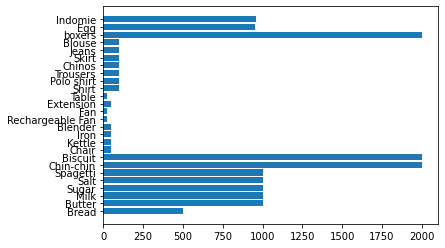

In [3]:
#connecting to a different database to obtain data and put in pandas dataframe for analysis

import psycopg2
import pandas as pd
import matplotlib.pyplot as plt


conn = psycopg2.connect(
    host="localhost",
    database="postgres",
    user="postgres",
    password="@Ebuka79")

cur = conn.cursor()

cur.execute('SELECT version()')

retrieve_com = """
SELECT * 
FROM test1_view
"""

cur.execute(retrieve_com)

data = cur.fetchall()

pd_data = pd.DataFrame(data, columns=['productkey','quantity','categorykey'])

plt.barh(pd_data['productkey'], pd_data['quantity'])
plt.show()

cur.close()

conn.close()


In [5]:
pd_data.groupby('categorykey').describe()

quantity                                                      \
               count      mean         std    min    25%     50%     75%   
categorykey                                                                
1               10.0  1141.000  477.876088  500.0  970.0  1000.0  1000.0   
2                8.0    40.625   12.938729   25.0   25.0    50.0    50.0   
3                8.0   337.500  671.751442  100.0  100.0   100.0   100.0   

                     
                max  
categorykey          
1            2000.0  
2              50.0  
3            2000.0

In [17]:
#function for opening and closing connection to postgres

def pg_connect(status,*var):

    global cur 
    
    if status == 'connect':
        cur = psycopg2.connect(
        host="localhost",
        database="postgres",
        user="postgres",
        password="@Ebuka79")
        return cur.cursor()

    elif status == 'close':
        var[0].close()
        cur.close()
        print('connection closed')

    else:
        stat = input('status code incorrect please select either connect or stop: ')
        pg_connect(stat)

    

In [18]:
import psycopg2
import pandas as pd

test = pg_connect('connect')

In [19]:
test.execute('SELECT version()')
test.fetchone()
#test.close()

('PostgreSQL 14.3, compiled by Visual C++ build 1914, 64-bit',)

In [20]:
pg_connect('close',(test))

connection closed
